<a href="https://colab.research.google.com/github/hyunjung930/machine-learning/blob/hyunjung/d08_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%matplotlib inline

In [4]:
wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
np.unique(wine['class'])

array([0., 1.])

In [7]:
wine.iloc[:,:-1].describe()# class 빠짐 
#iloc :

,alcohol,sugar,pH
count,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501
std,1.192712,4.757804,0.160787
min,8.000000,0.600000,2.720000
25%,9.500000,1.800000,3.110000
50%,10.300000,3.000000,3.210000
75%,11.300000,8.100000,3.320000
max,14.900000,65.800000,4.010000


In [8]:
wine.iloc[1:4,:3]

,alcohol,sugar,pH
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16


In [9]:
wine.loc[1:3,'alcohol':'pH'] 

,alcohol,sugar,pH
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16


In [10]:
pd.Categorical(wine['class'].astype('int')).describe()

,counts,freqs
categories,,
0,1599,0.246114
1,4898,0.753886


In [11]:
wine['class'].astype('category').describe()

count     6497.0
unique       2.0
top          1.0
freq      4898.0
Name: class, dtype: float64

In [12]:
wine.loc[:,'alcohol':'pH'].describe()

,alcohol,sugar,pH
count,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501
std,1.192712,4.757804,0.160787
min,8.000000,0.600000,2.720000
25%,9.500000,1.800000,3.110000
50%,10.300000,3.000000,3.210000
75%,11.300000,8.100000,3.320000
max,14.900000,65.800000,4.010000


In [13]:
pd.Categorical(wine['class']).describe()

,counts,freqs
categories,,
0.0,1599,0.246114
1.0,4898,0.753886


In [14]:
wine.iloc[:,:-1].to_numpy()

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [15]:
wine['class'].to_numpy() #astype: 타입 int로 만들어줌

array([0., 0., 0., ..., 1., 1., 1.])

In [16]:
# 양성데이터: 화이트 와인
data = wine.iloc[:,:-1].to_numpy() 
target = wine['class'].to_numpy()
train_input,test_input, train_target, test_target \
  = train_test_split(data, target, test_size = 0.2, random_state=42)

In [17]:
train_input.shape, train_target.shape

((5197, 3), (5197,))

In [18]:
test_input.shape, test_target.shape

((1300, 3), (1300,))

In [19]:
#트리계열은 scaling 같은 전처리가 필요없음(거리 개념 x)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42) #수업에서는 결과값이 같아야 됨으로 고정시켜야 한다. 
dt.fit(train_input, train_target)

DecisionTreeClassifier(random_state=42)

In [20]:
print(accuracy_score(train_target, dt.predict(train_input)))
print(accuracy_score(test_target, dt.predict(test_input))) #일반화 성능이 떨어짐. 과적합 상태

0.996921300750433
0.8584615384615385


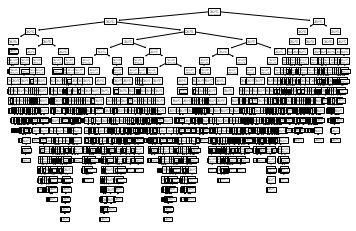

In [21]:
from sklearn.tree import plot_tree

plot_tree(dt)
plt.show()

In [23]:
train_input# 전달 정보의 오류가 없음

array([[10.5 ,  7.7 ,  3.19],
       [12.4 ,  2.1 ,  3.26],
       [11.8 ,  2.1 ,  3.41],
       ...,
       [ 9.5 ,  5.6 ,  3.24],
       [ 9.5 ,  8.  ,  3.18],
       [ 9.5 ,  2.7 ,  3.51]])

In [26]:
fnames = wine.iloc[:,:-1].columns.to_list()
fnames

['alcohol', 'sugar', 'pH']

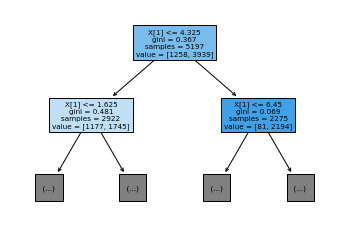

In [22]:
plot_tree(dt, max_depth = 1, filled = True, feature_names = fnames)
plt.show()
# X : feature

In [28]:
data.shape, train_input.shape, test_input.shape

((6497, 3), (5197, 3), (1300, 3))

In [30]:
np.unique(train_target, return_counts= True)

(array([0., 1.]), array([1258, 3939]))

In [36]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(train_input, train_target)

print(accuracy_score(train_target, dt.predict(train_input)))
print(accuracy_score(test_target, dt.predict(test_input))) #일반화 성능이 떨어짐. 과적합 상태

0.8454877814123533
0.8415384615384616


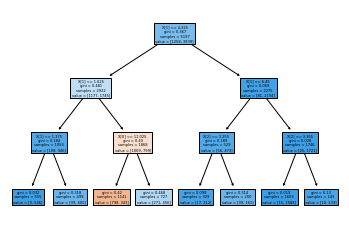

In [39]:
plot_tree(dt,filled = True)
plt.show()

In [40]:
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

In [46]:
fnames = wine.loc[:, 'alcohol':'pH'].columns.to_numpy()
fnames

array(['alcohol', 'sugar', 'pH'], dtype=object)

In [47]:
np.argsort(dt.feature_importances_)
#feature_importances_ : 결정 트리에서 계산한 특성 중요도가 저장되어 있는 속성
 # 오름차순으로 정리했을 때의 인덱스 출력

array([2, 0, 1])

In [48]:
desc_idx = np.argsort(dt.feature_importances_)[::-1] #내림차순
desc_idx

array([1, 0, 2])

In [49]:
fnames[desc_idx]

array(['sugar', 'alcohol', 'pH'], dtype=object)

In [51]:
top2 = fnames[desc_idx][:2]
top2

array(['sugar', 'alcohol'], dtype=object)

0.8874350586877044
0.8615384615384616


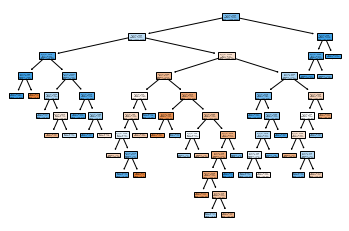

In [56]:
# 책 p241
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(accuracy_score(train_target, dt.predict(train_input)))
print(accuracy_score(test_target, dt.predict(test_input)))
plot_tree(dt,filled = True)
plt.savefig("dt_01.png", dpi = 600) #dpi: 파일 파악
plt.show()